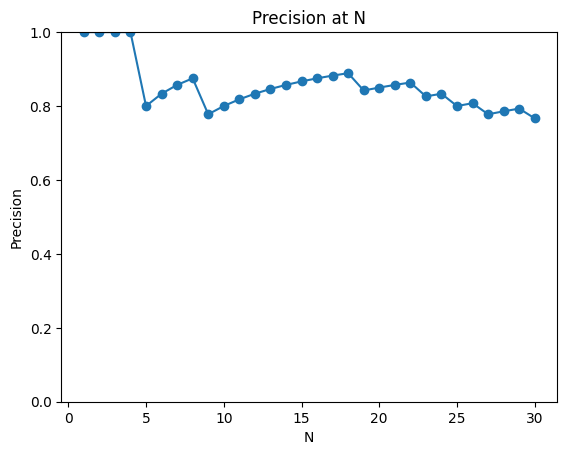

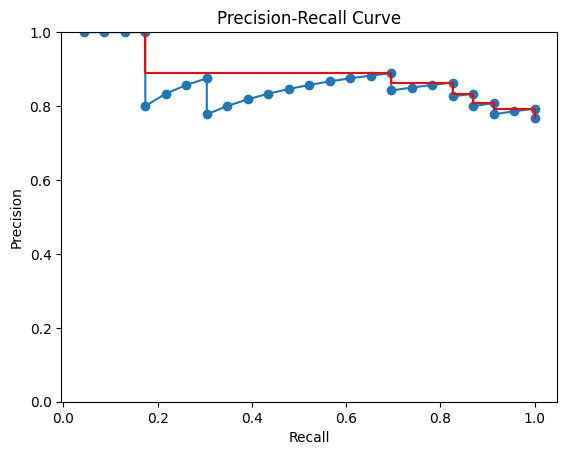

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

def read_csv(file_path):
    data = np.genfromtxt(file_path, delimiter=',', skip_header=1)
    return data[:, 0], data[:, 1], data[:, 2], data[:, 3]

def plot_precision_at_n(N_values, precision_values):
    plt.plot(N_values, precision_values, marker='o')
    plt.title('Precision at N')
    plt.xlabel('N')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])  # Set y-axis limits from 0 to 1.0
    plt.show()

def plot_precision_recall_curve(recall, precision):
    fig, ax = plt.subplots(1, 1)
    decreasing_max_precision = np.maximum.accumulate(precision[::-1])[::-1]
    plt.plot(recall, precision, marker='o', linestyle='-')
    ax.step(recall, decreasing_max_precision, '-r')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.ylim([0.0, 1.0])  # Set y-axis limits from 0 to 1.0
    plt.show()

def calculate_average_precision(y_true, y_scores):
    return average_precision_score(y_true, y_scores)

def calculate_map(N_values, precision_values):
    return np.trapz(precision_values, N_values) / np.max(N_values)

def process_and_plot_csv_files(file_paths):
    for file_path in file_paths:
        N_values, precision_values, recall_values, f_measure_values = read_csv(file_path)

        # Plot Precision at N
        plot_precision_at_n(N_values, precision_values)

        # Plot Precision-Recall Curve
        plot_precision_recall_curve(recall_values, precision_values)

        # Calculate Average Precision
        #avg_precision = calculate_average_precision(recall_values, precision_values)
        #print(f'Average Precision for {file_path}: {avg_precision:.4f}')

        # Calculate Mean Average Precision (MAP)
        #map_value = calculate_map(N_values, precision_values)
        #print(f'Mean Average Precision (MAP) for {file_path}: {map_value:.4f}')

# Example usage:
csv_files = ['queries/ask4/metrics/metrics.csv']  # Replace with your file paths
process_and_plot_csv_files(csv_files)
